# imoprting the dependencies

In [4]:

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso 
from sklearn import metrics


In [5]:
car_dataset = pd.read_csv('car data.csv')

# inspecting the first 5 rows 

In [6]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
# cheaking the number of rows and columns
car_dataset.shape

(301, 9)

In [8]:
# cheaking some information 
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
# cheaking for missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [15]:
# cheaking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


# encoding the categorical data

In [21]:
# encoding fuel_type column
car_dataset.replace({'Fuel_Type':{'Petrol':0 , 'Diesel':1 , 'CNG':2}},inplace=True)

car_dataset.replace({'Seller_Type':{'Dealer':0 , 'Individual':1 }},inplace=True)

car_dataset.replace({'Transmission':{'Manual':0 , 'Automatic':1}},inplace=True)

In [23]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


# splitting the data into training and testing data

In [26]:
x = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
y = car_dataset['Selling_Price']

In [27]:
print(x)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [28]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [31]:
x_train , x_test , Y_train , Y_test = train_test_split(x,y ,test_size = 0.1, random_state = 2)

# model training

#  1.linear regression

In [32]:
lin_reg_model = LinearRegression()

In [33]:
lin_reg_model.fit(x_train, Y_train)

LinearRegression()

# model evaluation

In [34]:
# prediction on training data 
training_data_prediction = lin_reg_model.predict(x_train)

In [35]:
# r squared error
error_score = metrics.r2_score(Y_train , training_data_prediction)
print('r squared error ', error_score)

r squared error  0.8799451660493701


# visualize the actual prices with the predicted prices

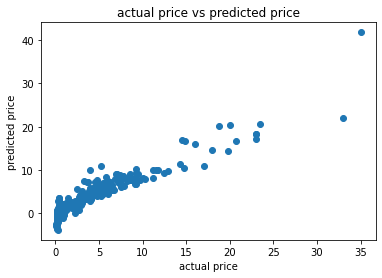

In [36]:
plt.scatter(Y_train , training_data_prediction)
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.title('actual price vs predicted price')
plt.show()

In [37]:
# prediction on training data 
test_data_prediction = lin_reg_model.predict(x_test)

In [38]:
# r squared error
error_score = metrics.r2_score(Y_test , test_data_prediction)
print('r squared error ', error_score)

r squared error  0.836576671502687


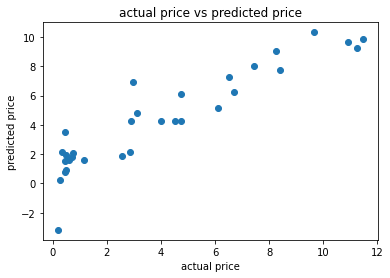

In [39]:
plt.scatter(Y_test , test_data_prediction)
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.title('actual price vs predicted price')
plt.show()

# lasso regression

In [50]:
lass_reg_model = Lasso()

In [51]:
lass_reg_model.fit(x_train, Y_train)

Lasso()

# model evaluation

In [52]:
# prediction on training data 
training_data_prediction = lass_reg_model.predict(x_train)

In [53]:
# r squared error
error_score = metrics.r2_score(Y_train , training_data_prediction)
print('r squared error ', error_score)

r squared error  0.8427856123435794


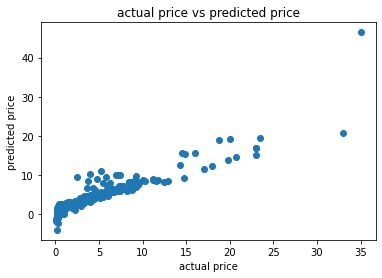

In [54]:
plt.scatter(Y_train , training_data_prediction)
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.title('actual price vs predicted price')
plt.show()

In [55]:
# prediction on training data 
test_data_prediction = lass_reg_model.predict(x_test)

In [56]:
# r squared error
error_score = metrics.r2_score(Y_test , test_data_prediction)
print('r squared error ', error_score)

r squared error  0.8709167941173195


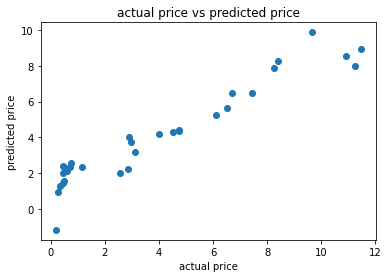

In [57]:
plt.scatter(Y_test , test_data_prediction)
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.title('actual price vs predicted price')
plt.show()